In [32]:
from matplotlib import pyplot
import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
train16 = pd.read_csv("zillow_data/train_2016_v2.csv", parse_dates=["transactiondate"])
print(train16.shape)
train16.tail()

(90275, 3)


,parcelid,logerror,transactiondate
90270,10774160,-0.0356,2016-12-30
90271,12046695,0.0070,2016-12-30
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30
90274,12566293,0.4207,2016-12-30


In [3]:
property16 = pd.read_csv("zillow_data/properties_2016.csv")
print(property16.shape)
property16.tail()

C:\Users\USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,168176230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,14273630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,168040630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,168040830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,168040430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Aircondiztioningtypeid & Heatingorsystemtypeid In Properties

##### airconditioningtypeid :  Type of cooling system present in the home (if any)
    - 집 안 냉방시스템 종류의 아이디(제품 번호)
    - 72.8%의 값이 Nan 값(소수점 둘째 자리에서 반올림)
    - 전체 Nan값 2173698개 중에 1066214개의 heatingorsystemtypeid 값은 NaN이 아님.
    
##### heatingorsystemtypeid :  Type of home heating system
    - 집 안 난방시스템 종류의 아이디(제품 번호)
    - 39.5%의 값이 Nan 값(소수점 둘째 자리에서 반올림)
    - 전체 Nan값 1178816개 중에 71332개의 airconditioningtypeid 값은 NaN이 아님.

In [4]:
hvac_prop16 = property16[["airconditioningtypeid", "heatingorsystemtypeid"]]

,column_name,missing_count
1,heatingorsystemtypeid,1178816
0,airconditioningtypeid,2173698


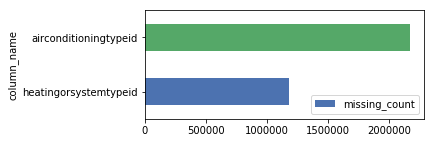

In [5]:
missing_hvac16 = hvac_prop16.isnull().sum(axis=0).reset_index()
missing_hvac16.columns = ['column_name', 'missing_count']
missing_hvac16 = missing_hvac16.sort_values(by='missing_count')

fig, ax2 = pyplot.subplots(figsize=(5,2))
missing_hvac16.plot("column_name", "missing_count", kind="barh", color=sns.color_palette("deep", 3), ax=ax2)

missing_hvac16

In [6]:
missing_hvac16["nan_rate"] = missing_hvac16["missing_count"] / len(property16)
missing_hvac16

,column_name,missing_count,nan_rate
1,heatingorsystemtypeid,1178816,0.394885
0,airconditioningtypeid,2173698,0.728154


In [7]:
count = 0
for idx in range(0, len(hvac_prop16.index)):
    if np.isnan(hvac_prop16["heatingorsystemtypeid"][idx]) and np.isnan(hvac_prop16["airconditioningtypeid"][idx]):
        count += 1
count

1107484

In [141]:
# count = (heatingorsystemtypeid 와 airconditioningtypeid 모두 빈값인 경우)

In [8]:
# heatingorsystemtypeid의 값이 비어 있을 때, airconditioningtypeid의 값은 비어 있지 않은 경우.
1178816 - count

71332

In [9]:
#airconditioningtypeid의 값이 비어 있을 때, heatingorsystemtypeid의 값은 비어있지 않은 경우.
2173698 - count

1066214

##### heatingorsystemtypeid == 2 일때, airconditioningtypeid 컬럼은 총 1156380개 인데 그중 빈값은 총 449720개이다.
    - heatingorsystemtypeid == 2 일때, airconditioningtypeid 컬럼에 채워져 있는 값의 99.99%가 1.0 이다.
    - '그러므로 heatingorsystemtypeid == 2 일때, airconditioningtypeid 컬럼의 빈값은 1.0 이다' 라는 사건의 확률은 99.99%라 할 수 있다.

In [7]:
hvac_prop16[hvac_prop16["heatingorsystemtypeid"] == 2.0]["airconditioningtypeid"].isna().sum()

449720

In [8]:
len(hvac_prop16[hvac_prop16["heatingorsystemtypeid"] == 2.0]["airconditioningtypeid"])

1156830

In [9]:
hvac_prop16[hvac_prop16["heatingorsystemtypeid"] == 2.0]["airconditioningtypeid"].value_counts()

1.0     707094
9.0         15
13.0         1
Name: airconditioningtypeid, dtype: int64

In [10]:
707094 / 707110

0.9999773726860036

In [11]:
hvac_prop16["airconditioningtypeid"].value_counts()

1.0     742364
13.0     58457
5.0       8795
11.0      1818
12.0        59
9.0         19
3.0          7
Name: airconditioningtypeid, dtype: int64

##### airconditioningtypeid == 1.0 일때, heatingorsystemtypeid 컬럼은 총 742364개 인데 그중 빈값은 총 13174개이다.
    - airconditioningtypeid == 1.0 일때, heatingorsystemtypeid 컬럼에 채워져 있는 값의 96.96%가 2.0 이다.
    - '그러므로 airconditioningtypeid == 1.0 일때, heatingorsystemtypeid 컬럼의 빈값은 2.0 이다' 라는 사건의 확률은 96.96%라 할 수 있다.

In [12]:
hvac_prop16[hvac_prop16["airconditioningtypeid"] == 1.0]["heatingorsystemtypeid"].isna().sum()

13174

In [13]:
len(hvac_prop16[hvac_prop16["airconditioningtypeid"] == 1.0]["heatingorsystemtypeid"])

742364

In [14]:
hvac_prop16[hvac_prop16["airconditioningtypeid"] == 1.0]["heatingorsystemtypeid"].value_counts()

2.0     707094
6.0      13206
24.0      6942
13.0       973
20.0       603
7.0        208
1.0         65
18.0        51
10.0        20
12.0        18
11.0         6
14.0         3
19.0         1
Name: heatingorsystemtypeid, dtype: int64

In [15]:
707094 / 729190

0.9696978839534278

In [16]:
hvac_prop16["heatingorsystemtypeid"].value_counts()

2.0     1156830
7.0      595453
6.0       27480
24.0      21107
20.0       3216
13.0       1342
18.0        586
1.0         262
14.0         41
10.0         39
12.0         25
11.0         16
21.0          3
19.0          1
Name: heatingorsystemtypeid, dtype: int64

### 결론1 : airconditioningtypeid의 비어있는 값 2173698 개 중에 449720 개는 heatingorsystemtypeid의 값을 보고 99.99% 예측해서 채워넣을 수 있다.
### 결론2 : heatingorsystemtypeid의 비어있는 값 1178816 개 중에 13174 개는 airconditioningtypeid의 값을 보고 96.96% 예측해서 채워넣을 수 있다.

============================================================================================

## Airconditioningtypeid & Heatingorsystemtypeid with Logerro

In [46]:
new_train16 = train16.set_index('parcelid').join(property16.set_index('parcelid'))
new_train16.head()

,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,
10711738,0.0276,2016-08-02,1.0,NaN,NaN,3.0,4.0,NaN,4.0,3.0,...,NaN,NaN,245180.0,567112.0,2015.0,321932.0,7219.18,NaN,NaN,6.037113e+13
10711755,-0.0182,2016-08-02,1.0,NaN,NaN,3.0,3.0,NaN,4.0,3.0,...,NaN,NaN,254691.0,459844.0,2015.0,205153.0,6901.09,NaN,NaN,6.037113e+13
10711805,-0.1009,2016-05-03,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,...,NaN,NaN,235114.0,384787.0,2015.0,149673.0,4876.61,NaN,NaN,6.037113e+13
10711816,-0.0121,2016-04-05,1.0,NaN,NaN,2.0,4.0,NaN,4.0,2.0,...,NaN,NaN,262309.0,437176.0,2015.0,174867.0,5560.07,NaN,NaN,6.037113e+13
10711858,-0.0481,2016-07-15,1.0,NaN,NaN,2.0,4.0,NaN,4.0,2.0,...,NaN,NaN,232037.0,382055.0,2015.0,150018.0,4878.25,NaN,NaN,6.037113e+13


### 첫번째 모델 - 비율이 가장 높은 airconditioningtypeid = 1.0, heatingorsystemtypeid = 2.0을 채우고,나머지를 NaN을 0으로 처리 후, category로 모델 만들었을 시 전혀 의미를 가지지 못하는 컬럼이 됨.

In [47]:
new_train16.loc[new_train16["heatingorsystemtypeid"] == 2.0, "airconditioningtypeid"] = 1.0
new_train16.loc[new_train16["airconditioningtypeid"] == 1.0, "heatingorsystemtypeid"] = 2.0
new_train16[["airconditioningtypeid", "heatingorsystemtypeid"]].isna().sum()

airconditioningtypeid    48681
heatingorsystemtypeid    33948
dtype: int64

In [48]:
new_train16.loc[np.isnan(new_train16["airconditioningtypeid"]), "airconditioningtypeid"] = 0.0
new_train16.loc[np.isnan(new_train16["heatingorsystemtypeid"]), "heatingorsystemtypeid"] = 0.0
new_train16[["airconditioningtypeid", "heatingorsystemtypeid"]].isna().sum()

airconditioningtypeid    0
heatingorsystemtypeid    0
dtype: int64

In [51]:
df = new_train16[["airconditioningtypeid", "heatingorsystemtypeid", "logerror"]]
df[["airconditioningtypeid", "heatingorsystemtypeid"]].astype('category')
df.head()

,airconditioningtypeid,heatingorsystemtypeid,logerror
parcelid,,,
10711738,1.0,2.0,0.0276
10711755,1.0,2.0,-0.0182
10711805,1.0,2.0,-0.1009
10711816,1.0,2.0,-0.0121
10711858,1.0,2.0,-0.0481


In [52]:
model_hvac16 = sm.OLS.from_formula("logerror ~  C(airconditioningtypeid) + C(heatingorsystemtypeid)",df)
result_hvac16 = model_hvac16.fit()
print(result_hvac16.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.880
Date:                Mon, 02 Jul 2018   Prob (F-statistic):             0.0176
Time:                        23:15:15   Log-Likelihood:                 36750.
No. Observations:               90275   AIC:                        -7.347e+04
Df Residuals:                   90258   BIC:                        -7.331e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

============================================================================================

### 두번째 모델 - airconditioningtypeid와 heatingorsystemtypeid가 있다/없다(1.0/0.0)으로 나누어 처리후 모델을 만들었을 시 또한 의미를 가지지 못한다.

In [55]:
new_train16 = train16.set_index('parcelid').join(property16.set_index('parcelid'))
new_train16.head()

,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,
10711738,0.0276,2016-08-02,1.0,NaN,NaN,3.0,4.0,NaN,4.0,3.0,...,NaN,NaN,245180.0,567112.0,2015.0,321932.0,7219.18,NaN,NaN,6.037113e+13
10711755,-0.0182,2016-08-02,1.0,NaN,NaN,3.0,3.0,NaN,4.0,3.0,...,NaN,NaN,254691.0,459844.0,2015.0,205153.0,6901.09,NaN,NaN,6.037113e+13
10711805,-0.1009,2016-05-03,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,...,NaN,NaN,235114.0,384787.0,2015.0,149673.0,4876.61,NaN,NaN,6.037113e+13
10711816,-0.0121,2016-04-05,1.0,NaN,NaN,2.0,4.0,NaN,4.0,2.0,...,NaN,NaN,262309.0,437176.0,2015.0,174867.0,5560.07,NaN,NaN,6.037113e+13
10711858,-0.0481,2016-07-15,1.0,NaN,NaN,2.0,4.0,NaN,4.0,2.0,...,NaN,NaN,232037.0,382055.0,2015.0,150018.0,4878.25,NaN,NaN,6.037113e+13


In [56]:
new_train16.loc[~np.isnan(new_train16["airconditioningtypeid"]), "airconditioningtypeid"] = 1.0
new_train16.loc[~np.isnan(new_train16["heatingorsystemtypeid"]), "heatingorsystemtypeid"] = 1.0
new_train16.loc[np.isnan(new_train16["airconditioningtypeid"]), "airconditioningtypeid"] = 0.0
new_train16.loc[np.isnan(new_train16["heatingorsystemtypeid"]), "heatingorsystemtypeid"] = 0.0

new_train16[["airconditioningtypeid", "heatingorsystemtypeid"]].isna().sum()

airconditioningtypeid    0
heatingorsystemtypeid    0
dtype: int64

In [57]:
df = new_train16[["airconditioningtypeid", "heatingorsystemtypeid", "logerror"]]
df[["airconditioningtypeid", "heatingorsystemtypeid"]].astype('category')
df.head()

,airconditioningtypeid,heatingorsystemtypeid,logerror
parcelid,,,
10711738,1.0,1.0,0.0276
10711755,1.0,1.0,-0.0182
10711805,1.0,1.0,-0.1009
10711816,1.0,1.0,-0.0121
10711858,1.0,1.0,-0.0481


In [58]:
model_hvac16 = sm.OLS.from_formula("logerror ~  C(airconditioningtypeid) + C(heatingorsystemtypeid)",df)
result_hvac16 = model_hvac16.fit()
print(result_hvac16.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.024
Date:                Mon, 02 Jul 2018   Prob (F-statistic):             0.0179
Time:                        23:43:52   Log-Likelihood:                 36739.
No. Observations:               90275   AIC:                        -7.347e+04
Df Residuals:                   90272   BIC:                        -7.344e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [59]:
dfX0 = new_train16[["airconditioningtypeid", "heatingorsystemtypeid"]]
dfX = sm.add_constant(dfX0)
dfy = new_train16[["logerror"]]
df = pd.concat([dfX, dfy], axis=1)

In [60]:
model = sm.OLS(dfy, dfX)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.024
Date:                Mon, 02 Jul 2018   Prob (F-statistic):             0.0179
Time:                        23:43:55   Log-Likelihood:                 36739.
No. Observations:               90275   AIC:                        -7.347e+04
Df Residuals:                   90272   BIC:                        -7.344e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.01

### 그러므로 "airconditioningtypeid", "heatingorsystemtypeid" 둘만 봤을 경우 logerror와 크게 연관이 없다고 할 수 있다.

## Visualization

#### original

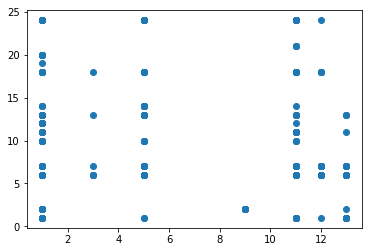

In [33]:
pyplot.scatter(hvac_prop16["airconditioningtypeid"], hvac_prop16["heatingorsystemtypeid"])

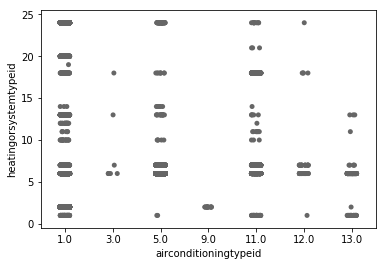

In [39]:
sns.stripplot(x="airconditioningtypeid", y="heatingorsystemtypeid", data=hvac_prop16, jitter=True, color="0.4")

#### model - 1

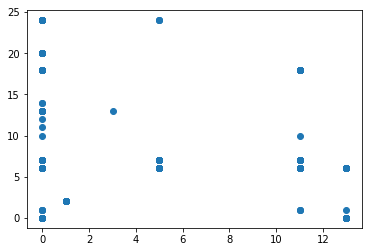

In [53]:
pyplot.scatter(new_train16["airconditioningtypeid"], new_train16["heatingorsystemtypeid"])

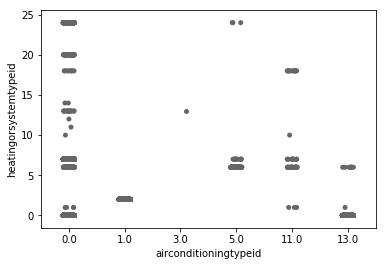

In [54]:
sns.stripplot(x="airconditioningtypeid", y="heatingorsystemtypeid", data=new_train16, jitter=True, color="0.4")

#### model - 2

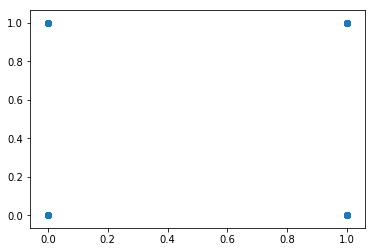

In [44]:
pyplot.scatter(new_train16["airconditioningtypeid"], new_train16["heatingorsystemtypeid"])

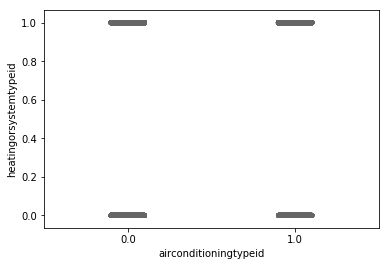

In [45]:
sns.stripplot(x="airconditioningtypeid", y="heatingorsystemtypeid", data=new_train16, jitter=True, color="0.4")